# Homework 7: Classification

This homework assignment is designed to give you practice with classification models. We'll try to predict which words are more likely to be responded to correctly during a lexical decision task, based on their length and frequency.

We will be using data from the English Lexicon Project again. However, this time we will use response correctness as our dependent variable. Load **LexicalData_withIncorrect.csv**, which includes incorrect trials as well as correct ones, and also **Items.csv**. Both can be found in the *Homework/lexDat* folder in the class GitHub repository. 

This data is a subset of the [English Lexicon Project database](https://elexicon.wustl.edu/). It provides response correctness and reaction times (in milliseconds) of many subjects as they are presented with letter strings and asked to decide, as quickly and as accurately as possible, whether the letter string is a word or not. The **Items.csv** provides characteristics of the words used, namely frequency (how common is this word?) and length (how many letters?). 

*Data courtesy of Balota, D.A., Yap, M.J., Cortese, M.J., Hutchison, K.A., Kessler, B., Loftis, B., Neely, J.H., Nelson, D.L., Simpson, G.B., & Treiman, R. (2007). The English Lexicon Project. Behavior Research Methods, 39, 445-459.*

---
## 1. Loading and formatting the data (1 point)

Load in data from the **LexicalData_withIncorrect.csv** and **Items.csv** files. Use `left_join` to add word characteristics `Length` and `Log_Freq_Hal` from **Items** to the **LexicalData**, and use `drop_na()` to get rid of any observations with missing values. Then use `head()` to look at the first few rows of the data. 

*Note: We're just working with `Correct` in this homework, so no need to worry about reformatting reaction times.*

In [38]:
library(tidyverse)

In [39]:
LexicalData <- read.csv(file = '../lexDat/LexicalData_withIncorrect.csv')

LexicalData$D_RT <- as.numeric(gsub(',','',LexicalData$D_RT))
LexicalData <- rename(LexicalData, Word = D_Word)

dim(LexicalData)
head(LexicalData)

[1] 74869     9

,X,Sub_ID,Trial,Type,D_RT,Word,Outlier,D_Zscore,Correct
,<int>,<int>,<int>,<int>,<dbl>,<chr>,<chr>,<dbl>,<int>
1,1,157,1,1,710,browse,false,-0.437,1
2,2,67,1,1,1094,refrigerant,false,0.825,1
3,3,120,1,1,587,gaining,false,-0.645,1
4,4,21,1,1,984,cheerless,false,0.025,1
5,5,236,1,1,577,pattered,false,-0.763,1
6,6,236,2,1,715,conjures,false,-0.364,1


In [40]:
Items <- read.csv(file = '../lexDat/Items.csv')

keeps <- c("Word","Length","Log_Freq_HAL")
Items <- Items[keeps]

dim(Items)
head(Items)

[1] 30959     3

,Word,Length,Log_Freq_HAL
,<chr>,<int>,<dbl>
1,synergistic,11,5.649
2,synonymous,10,6.858
3,syntactical,11,4.736
4,synthesis,9,8.816
5,synthesized,11,7.904
6,synthesizer,11,7.237


In [41]:
LexicalData <- dplyr::left_join(Items,LexicalData)
drop_na(LexicalData)


dim(LexicalData)
head(LexicalData) 

Joining, by = "Word"


Word,Length,Log_Freq_HAL,X,Sub_ID,Trial,Type,D_RT,Outlier,D_Zscore,Correct
<chr>,<int>,<dbl>,<int>,<int>,<int>,<int>,<dbl>,<chr>,<dbl>,<int>
synergistic,11,5.649,9098,148,449,1,776,false,0.125,1
synergistic,11,5.649,67239,224,194,1,710,false,-0.030,0
synonymous,10,6.858,28980,20,146,1,1525,false,1.235,1
synonymous,10,6.858,72883,280,146,1,1042,false,0.633,0
syntactical,11,4.736,974,162,47,1,1365,false,1.768,1
synthesis,9,8.816,10385,155,93,1,759,false,0.745,1
synthesized,11,7.904,55280,94,49,1,2850,false,4.134,1
synthesizer,11,7.237,54698,272,182,1,1966,false,2.699,1
synthesizer,11,7.237,68199,12,182,1,1035,false,1.924,0


[1] 70589    11

,Word,Length,Log_Freq_HAL,X,Sub_ID,Trial,Type,D_RT,Outlier,D_Zscore,Correct
,<chr>,<int>,<dbl>,<int>,<int>,<int>,<int>,<dbl>,<chr>,<dbl>,<int>
1,synergistic,11,5.649,9098,148,449,1,776,false,0.125,1
2,synergistic,11,5.649,67239,224,194,1,710,false,-0.030,0
3,synonymous,10,6.858,28980,20,146,1,1525,false,1.235,1
4,synonymous,10,6.858,72883,280,146,1,1042,false,0.633,0
5,syntactical,11,4.736,974,162,47,1,1365,false,1.768,1
6,synthesis,9,8.816,10385,155,93,1,759,false,0.745,1


---
## 2. Visualizing the data (1 point)

First, we'll try to visualize whether trials that are responded to correctly versus incorrectly differ from each other in terms of word length and log frequency. The code is included below, so that this homework doesn't get too cumbersome. All you have to do is **change the name of the data set**, **run the code**, and **write some observations about the output**.

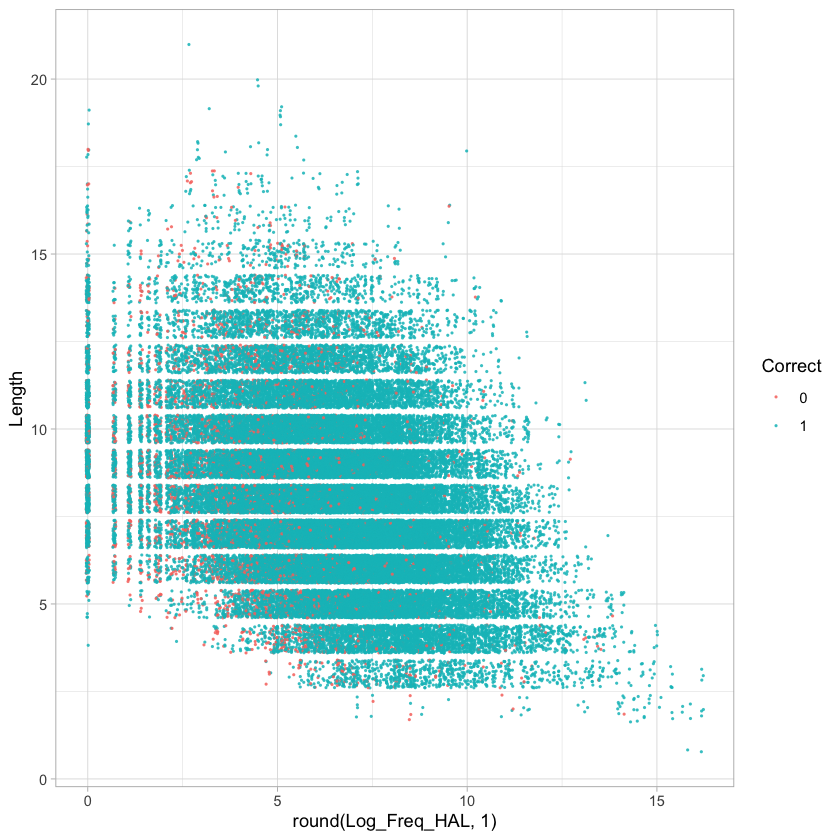

In [42]:
LexicalData$Correct <- as.factor(LexicalData$Correct) # so that R knows that Correct is categorical, not numeric. 
#LexicalData$Correct <- factor(LexicalData$Correct, levels = rev(levels(LexicalData$Correct)))

# plot the Correct / Incorrect clusters
ggplot(LexicalData,aes(x=round(Log_Freq_HAL,1),y=Length,col=Correct)) + 
 geom_point(position="jitter",alpha=0.75, size=0.25) + 
 theme_light() 


What do you observe about the "Correct" and "Incorrect" clusters? 

The `Log_Freq_HAL` cluster is densely concentrated at lower values (centered at roughly between 4 and 5) for Incorrect trials, whereas it's more or less uniform from 0:12 approximately, putting its center rouhgly between 6 and 7.

`Length` is *also* rather uniform for Incorrect trials, whereas the trend for the Correct trials shows a higher frequency of shorter words, and decreasing count as length increases.

---
## 3. Logistic Regression: Fitting the model (2 points)

Fit a logistic regression model to the data using `Length`, `Log_Freq_HAL`, and their interaction to predict `Correct`. Use `glm()` to fit the model, and look at its output using `summary()`.

In [44]:
logit_model <- glm(Correct ~ Length * Log_Freq_HAL, data = LexicalData, family = binomial)

In [45]:
summary(logit_model)


Call:
glm(formula = Correct ~ Length * Log_Freq_HAL, family = binomial, 
    data = LexicalData)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-3.0494   0.3178   0.4182   0.5208   1.3225  

Coefficients:
                     Estimate Std. Error z value Pr(>|z|)    
(Intercept)         -0.939996   0.115623  -8.130 4.30e-16 ***
Length               0.151266   0.012789  11.828  < 2e-16 ***
Log_Freq_HAL         0.394772   0.018762  21.041  < 2e-16 ***
Length:Log_Freq_HAL -0.010558   0.002202  -4.795 1.63e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 49809  on 70588  degrees of freedom
Residual deviance: 46563  on 70585  degrees of freedom
AIC: 46571

Number of Fisher Scoring iterations: 5


Call:

glm(formula = Correct ~ Length * Log_Freq_HAL, family = binomial, 
    data = LexicalData)

Deviance Residuals: 

    Min       1Q   Median       3Q      Max  
    
-3.0494   0.3178   0.4182   0.5208   1.3225  

Coefficients:

                     Estimate Std. Error z value Pr(>|z|)    
                     
(Intercept)         -0.939996   0.115623  -8.130 4.30e-16 ***

Length               0.151266   0.012789  11.828  < 2e-16 ***

Log_Freq_HAL         0.394772   0.018762  21.041  < 2e-16 ***

Length:Log_Freq_HAL -0.010588   0.002202  -4.795  1.63e-06 ***

Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 49809  on 70588  degrees of freedom

Residual deviance: 46563  on 70585  degrees of freedom

AIC: 46571

Number of Fisher Scoring iterations: 5


What can you conclude from this output? (a brief gist is fine)

The Correct response can be modeled  by a logistic regression composing of `Length`, `Log_Freq_HAL`, and their interaction with very high confidence. Both `Length` and `Log_Freq_HAL` are strong predictors. On all factors, we reject the null hypothesis.

---
## 4. Interpreting predictions from the model (3 points)

Finally, look at how well this logistic regression model does at predicting correctness. Use `predict()` and a threshold of 0.5 to generate predicted `Correct` values for each trial, then output a confusion matrix and overall accuracy for these predictions.

*Hint: see the Classifiers tutorial.*

In [62]:
prob <- predict(logit_model,LexicalData)
pred <- rep(1, nrow(LexicalData))
pred[prob < .5] = 0

confusion_df = data.frame(pred, LexicalData$Correct) #create confusion df
colnames(confusion_df) = c('predicted', 'actual')

# Show the confusion matrix
my_table <- table(confusion_df)

my_table

prop.table(my_table,margin = 2)

         actual
predicted     0     1
        0   229   589
        1  7750 62021

         actual
predicted           0           1
        0 0.028700338 0.009407443
        1 0.971299662 0.990592557

Did the model do well at predicting lexical decision correctness? Why or why not? 

While the model has a high true positive rate of 99%, it also has a 97% False Positive rate. Thus, it's highly sensitive, but low specificity. Put together, it's an okay model if you only care about detecting true positives, but not good at all if you want to accurately predict true negatives (like in the case we have here).

## 5. QDA (3 points)

Load in the `MASS` library and fit a QDA model to the data set. The predictors are still `Length`, `Log_Freq_HAL`, and their interaction, just like the logistic regression model you just ran, and the dependent variable is still `Correct`. 

*Hint: see the Classifiers tutorial.*

In [65]:
library(MASS)

qda_model = qda(Correct ~ Length * Log_Freq_HAL, data = LexicalData)
qda_model

Call:
qda(Correct ~ Length * Log_Freq_HAL, data = LexicalData)

Prior probabilities of groups:
        0         1 
0.1130346 0.8869654 

Group means:
    Length Log_Freq_HAL Length:Log_Freq_HAL
0 8.047124     4.932123            37.95260
1 7.979971     6.444849            49.34219

Now look at how well the predicted `Correct` values compare with actual `Correct` values for the whole data set. Output a confusion matrix and overall prediction accuracy. 

In [74]:
class <- predict(qda_model,LexicalData)

confusion_df = data.frame(class$class, LexicalData$Correct) #create confusion df
colnames(confusion_df) = c('predicted', 'actual')

# Show the confusion matrix
my_table <- table(confusion_df)

my_table

prop.table(my_table,margin = 2)

         actual
predicted     0     1
        0   455  1647
        1  7524 60963

         actual
predicted          0          1
        0 0.05702469 0.02630570
        1 0.94297531 0.97369430

How does QDA prediction performance differ from that of logistic regression?

True Positive rate is slightly decreased, from 99.0% to 97.4%. True Negative rate increased from 2.9% to 5.7%. Thus, the QDA model is slightly less sensitive, but slightly *more* specific.

**DUE:** 5pm EST, April 1, 2021

**IMPORTANT** Did you collaborate with anyone on this assignment? If so, list their names here. 
> *Someone's Name*